# Zadanie (przedziały ufności)

Z populacji włókien bawełny pobrano $300$--elementową próbkę włókien i zmierzono ich długości. Obliczono 

$$
\bar X = 27.43 \mbox{ oraz } S^{*2} =51.598.
$$ 

Znaleźć $95\%$ realizacje przedziału ufności dla nieznanej wartości.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

Przedział ufności dla <b>nieznanej wartości przeciętnej $\mu$</b> populacji, w której </b>badana cecha ma rozkład $N(\mu,\sigma^2)$</b>, w przypadku gdy <b>zarówno $\mu$ jak $\sigma$ są nieznane</b>, na podstawie $n$--elementowej próby $X_1,\ldots,X_n$ <b>($n
\geq100$)</b> wynosi

$$
\left(
\bar X - u \left(1-\frac{\alpha}{2} \right) \frac{S^{*}}{\sqrt{n}},
\bar X + u \left(1-\frac{\alpha}{2} \right) \frac{S^{*}}{\sqrt{n}}
\right)
$$

gdzie $u(\alpha)$ oznacza kwantyl rzędu $\alpha$ rozkładu normalnego $N(0,1)$ oraz

$$
S^{*2} = \frac{1}{n-1} \sum_{i=1}^{n} (X_{i} - \bar X).
$$

## Zdefiniujmy zmienną losową

In [2]:
n=300
(mu, sigma)=(0,1)
X=stats.norm(mu, sigma)

## Wylicz końce przedziałów

In [3]:
alpha=0.05
bar_x = 27.43
s = np.sqrt(51.598)
print(bar_x)
print(s)

27.43
7.183174785566616


In [4]:
L=bar_x-X.ppf(1-alpha/2)*(s/np.sqrt(n))

In [5]:
R=bar_x+X.ppf(1-alpha/2)*(s/np.sqrt(n))

## Wypisz przedział ufności

In [6]:
print(r'( %3.5f , %3.5f)' % (L,R))

( 26.61716 , 28.24284)


# Zadanie 2
Wykonaj zadanie za pomocą <tt>scipy</tt> i <tt>funkcji stats.norm.interval</tt>.

In [8]:
ci = stats.norm.interval(1-alpha, loc=bar_x, scale=s/np.sqrt(n))
ci

(26.617162188727715, 28.242837811272285)

# Zadanie 3
Narysuj przedział ufności na wykresie gęstości i dystrybuanty rozkładu statystyki
$$
U = \frac{\sqrt{n}(\bar X - \mu)}{S^{*}}
$$

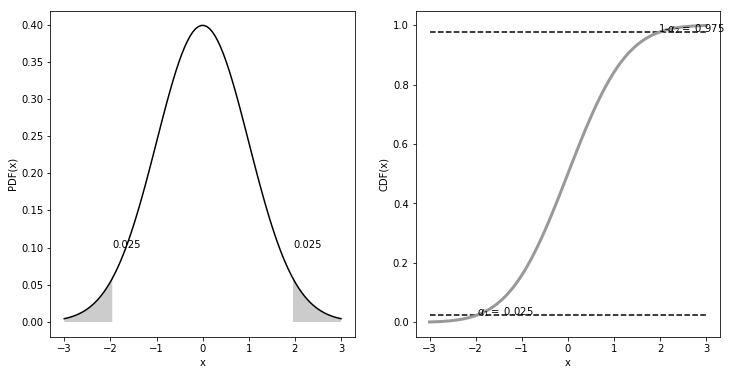

In [9]:
alpha_1=alpha/2
alpha_2=alpha-alpha_1

u_1=X.ppf(alpha_1)
u_2=X.ppf(1-alpha_2)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(-3, u_1)
y1 = X.pdf(x1)

x2 = np.linspace(u_2,3)
y2 = X.pdf(x2)

figs, axs = plt.subplots(1,2, figsize=(12, 6))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].fill_between(x2, y2, facecolor='#CCCCCC')
axs[0].text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs[0].text(u_2, 0.1, np.round(1-X.cdf(u_2),4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(u_1, X.cdf(u_1), r'$\alpha_1 = $ %.3f' % np.round(alpha_1,3))
axs[1].hlines(alpha_1, -3, 3, linestyles='--')
axs[1].text(u_2, X.cdf(u_2), r'1-$\alpha_2 = $ %.3f' % np.round(1-alpha_2,3))
axs[1].hlines(1-alpha_2, -3, 3, linestyles='--')
plt.show()

In [33]:
norm = stats.norm(0,1)
for i in range(1000):
    data = norm.rvs(size=100)
    ci = stats.norm.interval(1-0.05, loc=np.mean(data), scale=s/np.sqrt( len(data) ))
    if (ci[1]<0) or (ci[0]>0):
        print(ci)
    print(ci)

(-1.3777163807528292, 1.4380363941205294)
(-1.3805928602617892, 1.4351599146115694)
(-1.4597674809173404, 1.3559852939560182)
(-1.4185686666176052, 1.3971841082557535)
(-1.3200488178014778, 1.4957039570718809)
(-1.3333468177750762, 1.4824059570982824)
(-1.3549616638893884, 1.4607911109839702)
(-1.3880671159562172, 1.4276856589171414)
(-1.4845189350313104, 1.3312338398420482)
(-1.491712745781741, 1.3240400290916177)
(-1.5752118004527984, 1.2405409744205602)
(-1.4679025875085587, 1.3478501873648)
(-1.433034319612291, 1.3827184552610676)
(-1.3141836682925214, 1.5015691065808372)
(-1.4839502758326597, 1.331802499040699)
(-1.3719053466966928, 1.4438474281766658)
(-1.409973709267052, 1.4057790656063067)
(-1.4042953967733847, 1.411457378099974)
(-1.6394078873495397, 1.176344887523819)
(-1.3269075633193135, 1.4888452115540451)
(-1.4324545343137234, 1.3832982405596352)
(-1.5358860341358036, 1.279866740737555)
(-1.16015182749463, 1.6556009473787285)
(-1.3035593941692403, 1.5121933807041184)
(-1.

(-1.3722442711165233, 1.4435085037568354)
(-1.4838702622367492, 1.3318825126366094)
(-1.4372939866803713, 1.3784587881929873)
(-1.3668343970476262, 1.4489183778257324)
(-1.3875593222018712, 1.4281934526714875)
(-1.4096534390933584, 1.4060993357800002)
(-1.4668569057641332, 1.3488958691092254)
(-1.281024663613235, 1.5347281112601237)
(-1.3584427866190047, 1.4573099882543539)
(-1.3537477765855772, 1.4620049982877814)
(-1.5238971964335102, 1.2918555784398484)
(-1.513394949702612, 1.3023578251707466)
(-1.3613429651538531, 1.4544098097195055)
(-1.3929463574808933, 1.4228064173924653)
(-1.136480257742436, 1.6792725171309226)
(-1.5391613617094382, 1.2765914131639204)
(-1.5218011470098591, 1.2939516278634995)
(-1.324610211189697, 1.4911425636836617)
(-1.4196078777774588, 1.3961448970958998)
(-1.5007834626593568, 1.3149693122140018)
(-1.476063794691061, 1.3396889801822975)
(-1.432500091255241, 1.3832526836181176)
(-1.3231902537427165, 1.4925625211306421)
(-1.261280041713947, 1.5544727331594117)

In [30]:
# norm = stats.norm(0,1)
# data = norm.rvs(size=100)
# ci = stats.norm.interval(1-alpha, loc=np.mean(data), scale=s/np.sqrt( len(data) ))
# print(ci)
# for i in range(1000):
#     data = norm.rvs(size=100)
#     m = np.mean(data)
#     if (ci[0]<m) or (ci[0]>m):
#         print(m)
# #     print(ci)    